In [2]:
library("ArchR")
library("GenomicRanges")
library('BSgenome')
library('TxDb.Rnorvegicus.UCSC.rn6.refGene')
library('BSgenome.Rnorvegicus.UCSC.rn6')
library("org.Rn.eg.db")
library("dplyr")                                    # Load dplyr package
library("plyr")                                     # Load plyr package
library("readr")  
library(qdap)
library('Seurat')

In [3]:
proj3 <- loadArchRProject(path = ".", force = FALSE, showLogo = TRUE)
proj3

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /Users/NouroddinSotoudehChafi/Downloads/reports/customers/craft-test_ArchRProject 
samples(5): D01117_test D01116_test D01120_test D01118_test D01119_test
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... Condition Clusters
numberOfCells(1): 12149
medianTSS(1): 7.957
medianFrags(1): 21840

In [ ]:
getCellColData(proj3)$Condition

# Identifying Marker Genes

In [4]:
############------------------------Identifying Marker Genes--------------------------###################

markersGS <- getMarkerFeatures(
  ArchRProj = proj3, 
  useMatrix = "GeneScoreMatrix",
  groupBy = "Clusters",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "ttest",#"wilcoxon"

)



ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-16825a27cc65-Date-2023-05-17_Time-14-07-18.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2023-05-17 14:07:18 : Matching Known Biases, 0.001 mins elapsed.

2023-05-17 14:07:23 : Computing Pairwise Tests (1 of 13), 0.09 mins elapsed.

Pairwise Test C1 : Seqnames chr1

Pairwise Test C1 : Seqnames chr10

Pairwise Test C1 : Seqnames chr11

Pairwise Test C1 : Seqnames chr12

Pairwise Test C1 : Seqnames chr13

Pairwise Test C1 : Seqnames chr14

Pairwise Test C1 : Seqnames chr15

Pairwise Test C1 : Seqnames chr16

Pairwise Test C1 : Seqnames chr17

Pairwise Test C1 : Seqnames chr18

Pairwise Test C1 : Seqnames chr19

Pairwise Test C1 : Seqnames chr2

Pairwise Test C1 : Seqnames chr3

Pairwise Test C1 : Seqnames chr4

Pairwise Test C1 : Seqnames chr5

Pairwise Test C1 : Seqnames chr6

Pairwise Test C1 : Seqnames chr7

Pairwise Test C1 : Seqnames chr8

Pairwise Test C1 : Seqnames chr9

Pai

Pairwise Test C11 : Seqnames chr13

Pairwise Test C11 : Seqnames chr14

Pairwise Test C11 : Seqnames chr15

Pairwise Test C11 : Seqnames chr16

Pairwise Test C11 : Seqnames chr17

Pairwise Test C11 : Seqnames chr18

Pairwise Test C11 : Seqnames chr19

Pairwise Test C11 : Seqnames chr2

Pairwise Test C11 : Seqnames chr3

Pairwise Test C11 : Seqnames chr4

Pairwise Test C11 : Seqnames chr5

Pairwise Test C11 : Seqnames chr6

Pairwise Test C11 : Seqnames chr7

Pairwise Test C11 : Seqnames chr8

Pairwise Test C11 : Seqnames chr9

Pairwise Test C11 : Seqnames chrX

2023-05-17 14:09:31 : Computing Pairwise Tests (12 of 13), 2.229 mins elapsed.

Pairwise Test C12 : Seqnames chr1

Pairwise Test C12 : Seqnames chr10

Pairwise Test C12 : Seqnames chr11

Pairwise Test C12 : Seqnames chr12

Pairwise Test C12 : Seqnames chr13

Pairwise Test C12 : Seqnames chr14

Pairwise Test C12 : Seqnames chr15

Pairwise Test C12 : Seqnames chr16

Pairwise Test C12 : Seqnames chr17

Pairwise Test C12 : Seqnames c

In [5]:
# save for shiny app

saveRDS(markersGS,"markersGS_clusters.rds")

In [6]:
# save for shiny

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 0.20", plotLog2FC = TRUE,
#   labelMarkers = seleceted_markers,
  transpose = F,  returnMatrix = TRUE
)

write.csv(heatmapGS,"genes_per_cluster_hm.csv")

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-168253adc0018-Date-2023-05-17_Time-14-13-23.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	Pkhd1, Mir6898, Rpl31, Slc40a1, Plcl1, 6030407O03Rik, Tuba4a, Gigyf2, Golt1a, Prelp, C730036E19Rik, Gm20743, Aldh9a1, Nos1ap, Dusp12

C2:

	Ugt1a10, Espnl, Plekha6, Kcnh1, Pbld1, Nfic, Mir1191b, Nt5dc3, Mtmr3, Spns3, Gm11190, Flot2, Pgap3, Erbb2, Aoc3

C3:

	Xkr4, Rp1, Oprk1, Prex2, A830018L16Rik, Mir6341, 4930486I03Rik, 4931408C20Rik, Mir6342, Col5a2, Mir6350, Crygf, Unc80, Erbb4, 1700027A15Rik

C4:

	Ackr3, Rcor3, Gtf3c6, Il23a, Dmgdh, Baiap2l2, C1ql4, Pcyt1a, Zfp213, Macrod1, Mdk, Trim44, Erp44, Guca2b, Rab42

C5:

	Vil1, Glb1l, Stk16, Tmem198, Chpf, Ugt1a5, Sept2, 3830432H09Rik, Srgap2, Cdk18, Dhx9, Dcaf6, Dedd, Lamb3, 4930405J17Rik

C6:

	Khdc1c, Ifi203, Akt3, Mybpc1, Col23a1, Olfr385, Cd300ld4, Acvr1c, Gm13544, Atp8b4, Col25a1, Gm3414, Atp8a1, Zfp157, Gm10619

C7:

	Rrs1, 2610203C22Rik, 

  [1] "Pkhd1"         "Mir6898"       "Rpl31"         "Slc40a1"      
  [5] "Plcl1"         "6030407O03Rik" "Tuba4a"        "Gigyf2"       
  [9] "Golt1a"        "Prelp"         "C730036E19Rik" "Gm20743"      
 [13] "Aldh9a1"       "Nos1ap"        "Dusp12"        "Ugt1a10"      
 [17] "Espnl"         "Plekha6"       "Kcnh1"         "Pbld1"        
 [21] "Nfic"          "Mir1191b"      "Nt5dc3"        "Mtmr3"        
 [25] "Spns3"         "Gm11190"       "Flot2"         "Pgap3"        
 [29] "Erbb2"         "Aoc3"          "Xkr4"          "Rp1"          
 [33] "Oprk1"         "Prex2"         "A830018L16Rik" "Mir6341"      
 [37] "4930486I03Rik" "4931408C20Rik" "Mir6342"       "Col5a2"       
 [41] "Mir6350"       "Crygf"         "Unc80"         "Erbb4"        
 [45] "1700027A15Rik" "Ackr3"         "Rcor3"         "Gtf3c6"       
 [49] "Il23a"         "Dmgdh"         "Baiap2l2"      "C1ql4"        
 [53] "Pcyt1a"        "Zfp213"        "Macrod1"       "Mdk"          
 [57] "Trim44"      

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-168253adc0018-Date-2023-05-17_Time-14-13-23.log



In [7]:
heatmapGS

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
H2-K2,0.3486335000,0.139833428,0.36673891,-0.381037686,-0.16038375,-0.266152884,-0.210364036,-0.60304395,-0.1530490372,0.026833355,-0.433964420,-0.464194076,1.1594524
AA388235,0.4209125787,0.097811804,0.48154628,-0.422702077,-0.08303602,-0.277363272,-0.128592077,-0.69162314,-0.1561121756,-0.001015020,-0.506475913,-0.637076160,1.2824674
Zbtb7c,0.0563972537,0.060292684,0.28481570,-0.172421626,-0.19064502,-0.171709813,-0.330168251,-0.05538525,-0.3320111746,-0.025619080,0.099535067,-0.003843446,0.5433271
Pbx1,0.3108629110,-0.006182807,0.01908147,-0.101680409,-0.17820942,-0.096343722,-0.250447411,0.07176535,0.0292856401,-0.202164282,-0.331198068,-0.276646277,0.4770668
Meis2,0.2508177058,-0.004996516,0.05715556,-0.362950553,-0.24117590,-0.082533371,-0.387631959,0.19793517,-0.1044032625,-0.102617020,-0.086642599,-0.079844173,0.7554681
Dlc1,0.2432025687,-0.006905458,0.06937415,-0.126944933,-0.24471991,-0.022222411,-0.457971155,0.19701348,-0.1812149526,-0.133849539,-0.096514378,-0.075586274,0.7597515
Ptpn14,0.0419409068,-0.150515759,0.04463501,-0.055930385,-0.16006224,-0.018938440,-0.056753624,0.30528992,0.2868454857,-0.333486790,-0.219642617,0.155693309,0.5403116
Klf7,0.1885238527,-0.277666452,-0.23214474,-0.150607139,-0.00891290,-0.030508525,-0.101326104,0.26482835,0.0823506175,-0.092490793,-0.018621087,0.226900183,0.7390297
Csrp1,0.0272580893,-0.107123681,-0.04034968,-0.042915000,-0.12706804,-0.134698888,-0.306697406,0.26232522,-0.0009407425,-0.105693974,0.128801006,0.153812052,0.6127232
Ldb2,0.0534666558,-0.061636832,0.10052117,-0.408905041,-0.48579303,-0.006738973,-0.413631349,0.30883808,-0.2221886792,-0.098067877,-0.021752648,-0.470136992,0.6695262


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-16825418a45d8-Date-2023-05-17_Time-14-14-00.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2023-05-17 14:14:00 : Matching Known Biases, 0.001 mins elapsed.

2023-05-17 14:14:04 : Computing Pairwise Tests (1 of 5), 0.056 mins elapsed.

Pairwise Test D01116_test : Seqnames chr1

Pairwise Test D01116_test : Seqnames chr10

Pairwise Test D01116_test : Seqnames chr11

Pairwise Test D01116_test : Seqnames chr12

Pairwise Test D01116_test : Seqnames chr13

Pairwise Test D01116_test : Seqnames chr14

Pairwise Test D01116_test : Seqnames chr15

Pairwise Test D01116_test : Seqnames chr16

Pairwise Test D01116_test : Seqnames chr17

Pairwise Test D01116_test : Seqnames chr18

Pairwise Test D01116_test : Seqnames chr19

Pairwise Test D01116_test : Seqnames chr2

Pairwise Test D01116_test : Seqnames chr3

Pairwise Test D01116_test : Seqnames chr4

Pairwise Test D01116_test : Seqnames chr5

Pai

 [1] "Sox17"         "Npbwr1"        "Alkal1"        "Mir6341"      
 [5] "Sulf1"         "Slco5a1"       "Pi15"          "Gm16070"      
 [9] "Crispld1"      "Crisp4"        "Tfap2d"        "4931408C20Rik"
[13] "Gm5524"        "Mir6342"       "Lyg1"          "Mir6897"      
[17] "2010300C02Rik" "Aff3"          "Il1r1"         "Il1rl2"       
[21] "Gpr45"         "Myo1b"         "Hecw2"         "Mir7681"      
[25] "Aox3"          "Ica1l"         "Cd28"          "Pard3b"       
[29] "Gm13749"       "March4"        "Atp6v1h"       "Eya1"         
[33] "Msc"           "Trpa1"         "Ly96"          "4933415F23Rik"
[37] "Col9a1"        "Col19a1"       "Lmbrd1"        "Gm597"        
[41] "Gm5415"        "Arhgef4"       "Chst10"        "Hsfy2"        
[45] "Adam23"        "Lipt1"         "Slc40a1"       "Plcl1"        
[49] "Trak2"         "Gigyf2"        "Ppp1r15b"      "C730036E19Rik"
[53] "Fam129a"       "Aldh9a1"       "Pbx1"          "Nos1ap"       
[57] "Nvl"           "Plxna2"     

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-16825722daa6d-Date-2023-05-17_Time-14-15-21.log

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-168252bbcf0d7-Date-2023-05-17_Time-14-15-24.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

D01116_test:

	Sox17, Npbwr1, Alkal1, Mir6341, Sulf1, Slco5a1, Pi15, Gm16070, Crispld1, Crisp4, Tfap2d, 4931408C20Rik, Gm5524, Mir6342, Lyg1

D01117_test:

	Mir6897, 2010300C02Rik, Aff3, Il1r1, Il1rl2, Gpr45, Myo1b, Hecw2, Mir7681, Aox3, Ica1l, Cd28, Pard3b, Gm13749, March4

D01118_test:

	Atp6v1h, Eya1, Msc, Trpa1, Ly96, 4933415F23Rik, Col9a1, Col19a1, Lmbrd1, Gm597, Gm5415, Arhgef4, Chst10, Hsfy2, Adam23

D01119_test:

	Lipt1, Slc40a1, Plcl1, Trak2, Gigyf2, Ppp1r15b, C730036E19Rik, Fam129a, Aldh9a1, Pbx1, Nos1ap, Nvl, Plxna2, Pde7b, Ptprk

D01120_test:

	Adhfe1, Vcpip1, Rdh10, Phf3, Mir5103, Imp4, Ccdc115, Neurl3, Arid5a, Cox5b, Coa5, Txndc9, Eif5b, Pantr1, Pou

 [1] "Sox17"         "Npbwr1"        "Alkal1"        "Mir6341"      
 [5] "Sulf1"         "Slco5a1"       "Pi15"          "Gm16070"      
 [9] "Crispld1"      "Crisp4"        "Tfap2d"        "4931408C20Rik"
[13] "Gm5524"        "Mir6342"       "Lyg1"          "Mir6897"      
[17] "2010300C02Rik" "Aff3"          "Il1r1"         "Il1rl2"       
[21] "Gpr45"         "Myo1b"         "Hecw2"         "Mir7681"      
[25] "Aox3"          "Ica1l"         "Cd28"          "Pard3b"       
[29] "Gm13749"       "March4"        "Atp6v1h"       "Eya1"         
[33] "Msc"           "Trpa1"         "Ly96"          "4933415F23Rik"
[37] "Col9a1"        "Col19a1"       "Lmbrd1"        "Gm597"        
[41] "Gm5415"        "Arhgef4"       "Chst10"        "Hsfy2"        
[45] "Adam23"        "Lipt1"         "Slc40a1"       "Plcl1"        
[49] "Trak2"         "Gigyf2"        "Ppp1r15b"      "C730036E19Rik"
[53] "Fam129a"       "Aldh9a1"       "Pbx1"          "Nos1ap"       
[57] "Nvl"           "Plxna2"     

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-168252bbcf0d7-Date-2023-05-17_Time-14-15-24.log



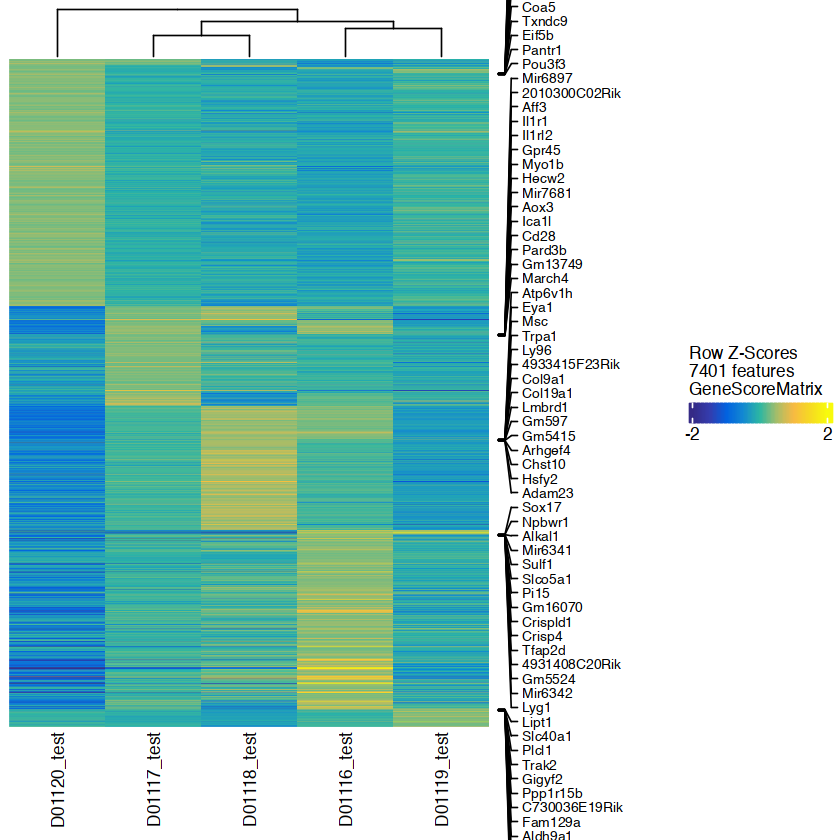

In [8]:
# per sample

######------------------------------Identifying Marker Genes--------------------------------#######

markersGS <- getMarkerFeatures(
  ArchRProj = proj3, 
  useMatrix = "GeneScoreMatrix", 
  groupBy = "Sample",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "ttest",#"wilcoxon"
)

# save for shiny app
saveRDS(markersGS,"markersGS_sample.rds")


proj3 <- addImputeWeights(proj3,reducedDims = "Harmony")                     
                     
options(repr.plot.width=7, repr.plot.height=7)

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 0.20", plotLog2FC = TRUE,
#   labelMarkers = seleceted_markers,
  transpose = F,  returnMatrix = FALSE
)
    
heatmapGS
                     
                     
                     
# save for shiny

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 0.20", plotLog2FC = TRUE,
#   labelMarkers = seleceted_markers,
  transpose = F,  returnMatrix = TRUE
)
write.csv(heatmapGS,"genes_per_sample_hm.csv")                     

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1682544ea4288-Date-2023-05-17_Time-14-15-51.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2023-05-17 14:15:51 : Matching Known Biases, 0.001 mins elapsed.

2023-05-17 14:15:52 : Computing Pairwise Tests (1 of 2), 0.01 mins elapsed.

Pairwise Test Lupus : Seqnames chr1

Pairwise Test Lupus : Seqnames chr10

Pairwise Test Lupus : Seqnames chr11

Pairwise Test Lupus : Seqnames chr12

Pairwise Test Lupus : Seqnames chr13

Pairwise Test Lupus : Seqnames chr14

Pairwise Test Lupus : Seqnames chr15

Pairwise Test Lupus : Seqnames chr16

Pairwise Test Lupus : Seqnames chr17

Pairwise Test Lupus : Seqnames chr18

Pairwise Test Lupus : Seqnames chr19

Pairwise Test Lupus : Seqnames chr2

Pairwise Test Lupus : Seqnames chr3

Pairwise Test Lupus : Seqnames chr4

Pairwise Test Lupus : Seqnames chr5

Pairwise Test Lupus : Seqnames chr6

Pairwise Test Lupus : Seqnames chr7

Pairwise Test Lupus 

 [1] "Stat1"         "Als2cr12"      "Ica1l"         "Pth2r"        
 [5] "Fbxo36"        "Sp100"         "A630001G21Rik" "Nmur1"        
 [9] "Inpp5d"        "Pdcd1"         "Steap3"        "Zranb3"       
[13] "Cxcr4"         "Il10"          "Mapkapk2"      "Xkr4"         
[17] "Pkhd1"         "Lincmd1"       "Rfx8"          "Slc9a2"       
[21] "Fhl2"          "Gulp1"         "Plcl1"         "Igfbp5"       
[25] "1700027A15Rik" "6030407O03Rik" "Cxcr1"         "Ngef"         
[29] "Neu2"          "Ugt1a10"      


Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-168251a5c11bc-Date-2023-05-17_Time-14-16-30.log

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-168254350ea44-Date-2023-05-17_Time-14-16-32.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

Lupus:

	Stat1, Als2cr12, Ica1l, Pth2r, Fbxo36, Sp100, A630001G21Rik, Nmur1, Inpp5d, Pdcd1, Steap3, Zranb3, Cxcr4, Il10, Mapkapk2

WT:

	Xkr4, Pkhd1, Lincmd1, Rfx8, Slc9a2, Fhl2, Gulp1, Plcl1, Igfbp5, 1700027A15Rik, 6030407O03Rik, Cxcr1, Ngef, Neu2, Ugt1a10

Identified 1153 markers!



 [1] "Stat1"         "Als2cr12"      "Ica1l"         "Pth2r"        
 [5] "Fbxo36"        "Sp100"         "A630001G21Rik" "Nmur1"        
 [9] "Inpp5d"        "Pdcd1"         "Steap3"        "Zranb3"       
[13] "Cxcr4"         "Il10"          "Mapkapk2"      "Xkr4"         
[17] "Pkhd1"         "Lincmd1"       "Rfx8"          "Slc9a2"       
[21] "Fhl2"          "Gulp1"         "Plcl1"         "Igfbp5"       
[25] "1700027A15Rik" "6030407O03Rik" "Cxcr1"         "Ngef"         
[29] "Neu2"          "Ugt1a10"      


ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-168254350ea44-Date-2023-05-17_Time-14-16-32.log



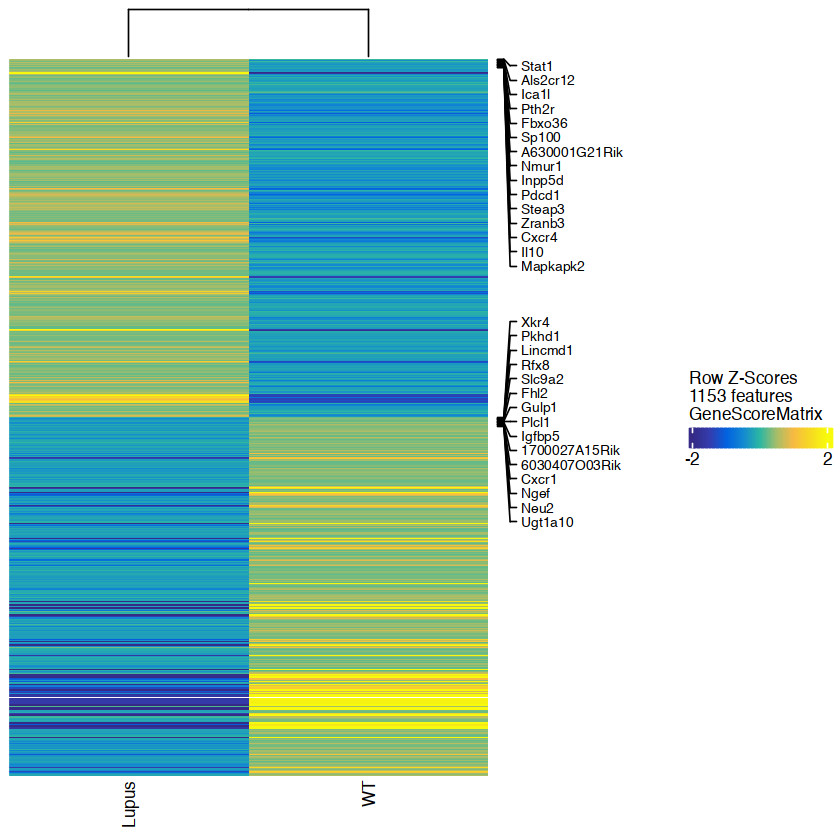

In [9]:
# per treatment

######------------------------------Identifying Marker Genes--------------------------------#######

markersGS <- getMarkerFeatures(
  ArchRProj = proj3, 
  useMatrix = "GeneScoreMatrix", 
  groupBy = "Condition",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "ttest",#"wilcoxon"
)
# save for shiny app
saveRDS(markersGS,"markersGS_treatment.rds")


proj3 <- addImputeWeights(proj3,reducedDims = "Harmony")                     
                     
options(repr.plot.width=7, repr.plot.height=7)

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 0.20", plotLog2FC = TRUE,
#   labelMarkers = seleceted_markers,
  transpose = F,  returnMatrix = FALSE
)
    
heatmapGS
                     
                     
                     
# save for shiny

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 0.20", plotLog2FC = TRUE,
#   labelMarkers = seleceted_markers,
  transpose = F,  returnMatrix = TRUE
)
write.csv(heatmapGS,"genes_per_treatment_hm.csv")                     

# Volcano plots for genes

In [ ]:
# for all clusters together

In [10]:
  ncells <- length(proj3$cellNames)

  markerList <- getMarkerFeatures(
  ArchRProj = proj3,
  useMatrix = "GeneScoreMatrix", 
  groupBy = "Condition",
  bias = c("TSSEnrichment", "log10(nFrags)"),maxCells = ncells ,normBy = "none",
  testMethod = "ttest")

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1682551f2b993-Date-2023-05-17_Time-14-23-30.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2023-05-17 14:23:31 : Matching Known Biases, 0.001 mins elapsed.

2023-05-17 14:23:34 : Computing Pairwise Tests (1 of 2), 0.056 mins elapsed.

Pairwise Test Lupus : Seqnames chr1

Pairwise Test Lupus : Seqnames chr10

Pairwise Test Lupus : Seqnames chr11

Pairwise Test Lupus : Seqnames chr12

Pairwise Test Lupus : Seqnames chr13

Pairwise Test Lupus : Seqnames chr14

Pairwise Test Lupus : Seqnames chr15

Pairwise Test Lupus : Seqnames chr16

Pairwise Test Lupus : Seqnames chr17

Pairwise Test Lupus : Seqnames chr18

Pairwise Test Lupus : Seqnames chr19

Pairwise Test Lupus : Seqnames chr2

Pairwise Test Lupus : Seqnames chr3

Pairwise Test Lupus : Seqnames chr4

Pairwise Test Lupus : Seqnames chr5

Pairwise Test Lupus : Seqnames chr6

Pairwise Test Lupus : Seqnames chr7

Pairwise Test Lupus

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-168257f35801f-Date-2023-05-17_Time-14-27-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-168257f35801f-Date-2023-05-17_Time-14-27-14.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-16825116eb478-Date-2023-05-17_Time-14-27-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-16825116eb478-Date-2023-05-17_Time-14-27-14.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-168257b0a3b38-Date-2023-05-17_Time-14-27-15.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-168257b0a3b38-Date-2023-05-17_Ti

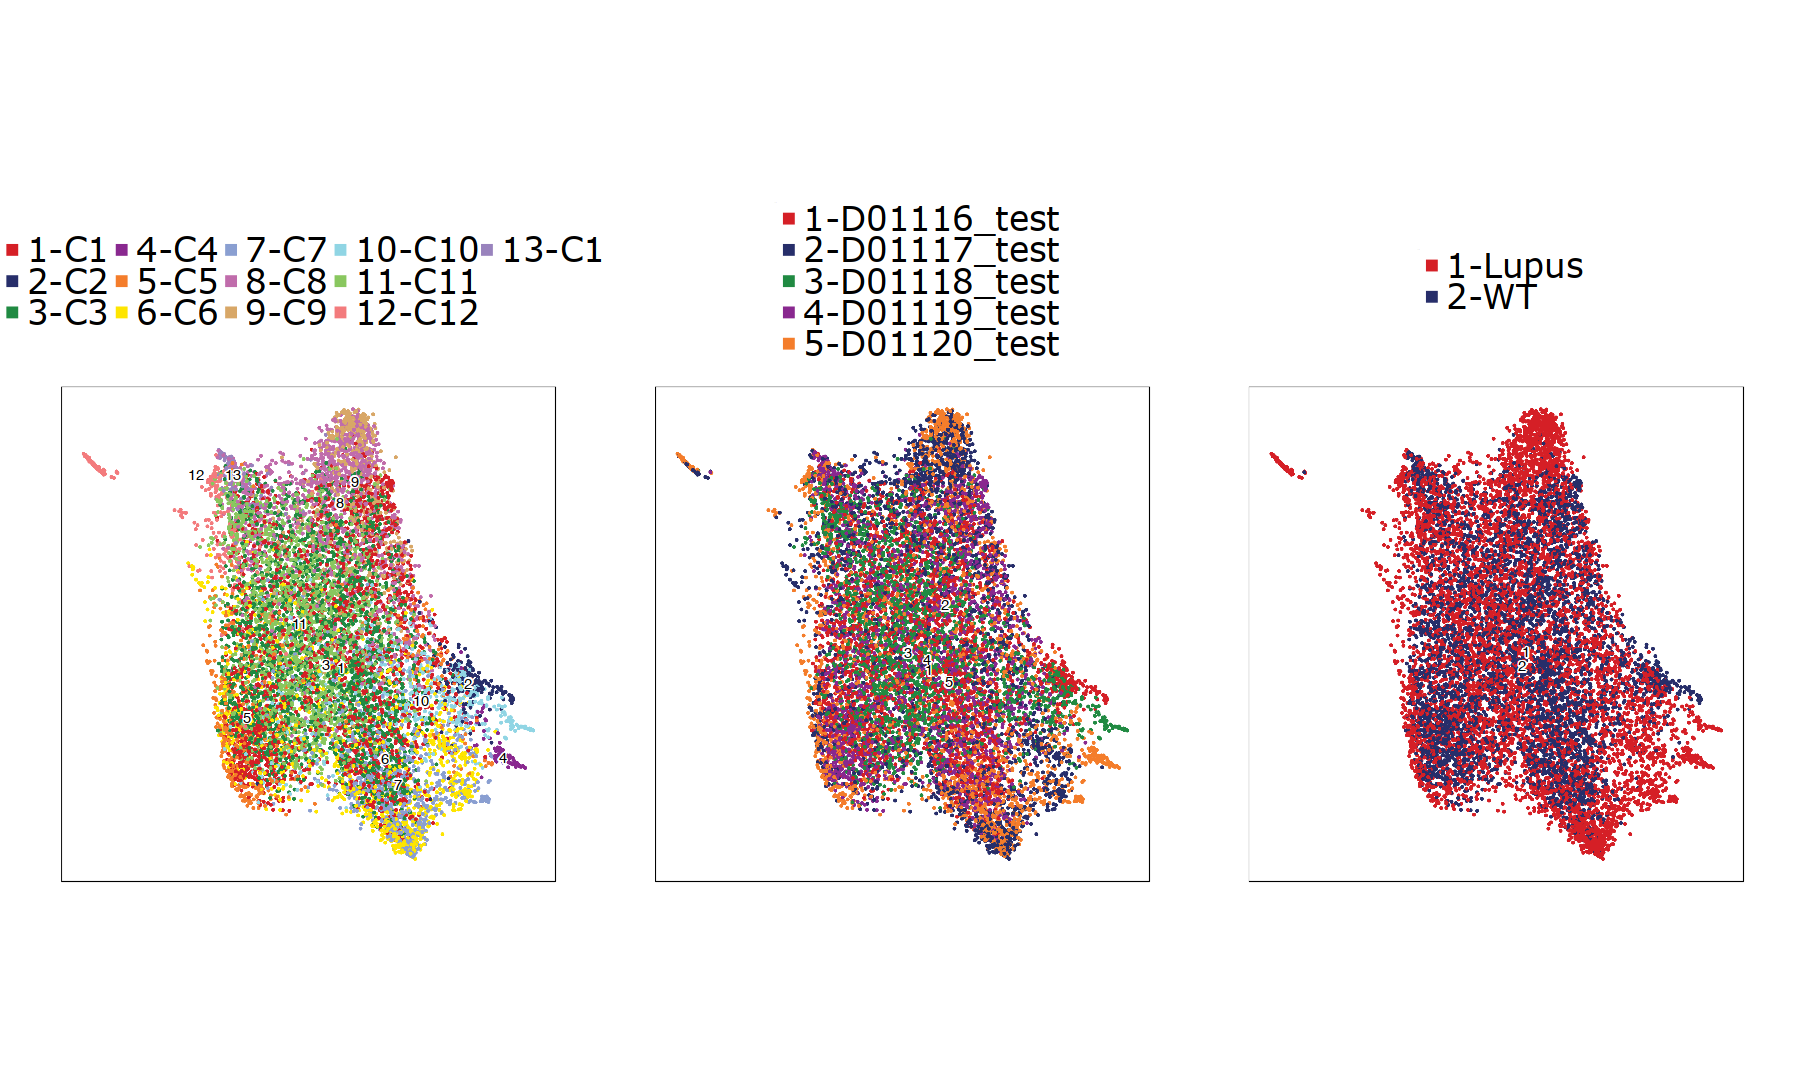

In [14]:


p4<-plotEmbedding(ArchRProj = proj3, colorBy = "cellColData", name = "Clusters", embedding = "UMAP"
                  ,size=1.0, baseSize = 10)+
            theme(legend.position = "top",legend.direction= "horizontal"
                , legend.text=element_text(size=20), legend.title=element_text(size=0))+
   theme(
  plot.title = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank())
# p4
p5<-plotEmbedding(ArchRProj = proj3, colorBy = "cellColData", name = "Sample", embedding = "HA"
                  ,size=1.0, baseSize = 10)+
            theme(legend.position = "top",legend.direction= "vertical"
                , legend.text=element_text(size=20), legend.title=element_text(size=0))+
   theme(
  plot.title = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank())
# p5

p6<-plotEmbedding(ArchRProj = proj3, colorBy = "cellColData", name = "Condition", embedding = "UMAP"
                  ,size=1.0, baseSize = 10)+
            theme(legend.position = "top",legend.direction= "vertical"
                , legend.text=element_text(size=20), legend.title=element_text(size=0))+
   theme(
  plot.title = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank())
# p6


options(repr.plot.width=15, repr.plot.height=9)

p4 + p5 + p6 

Warning message in melt(table(req_DF$Clusters, req_DF$Condition)):
“The melt generic in data.table has been passed a table and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(table(req_DF$Clusters, req_DF$Condition)). In the next version, this warning will become an error.”


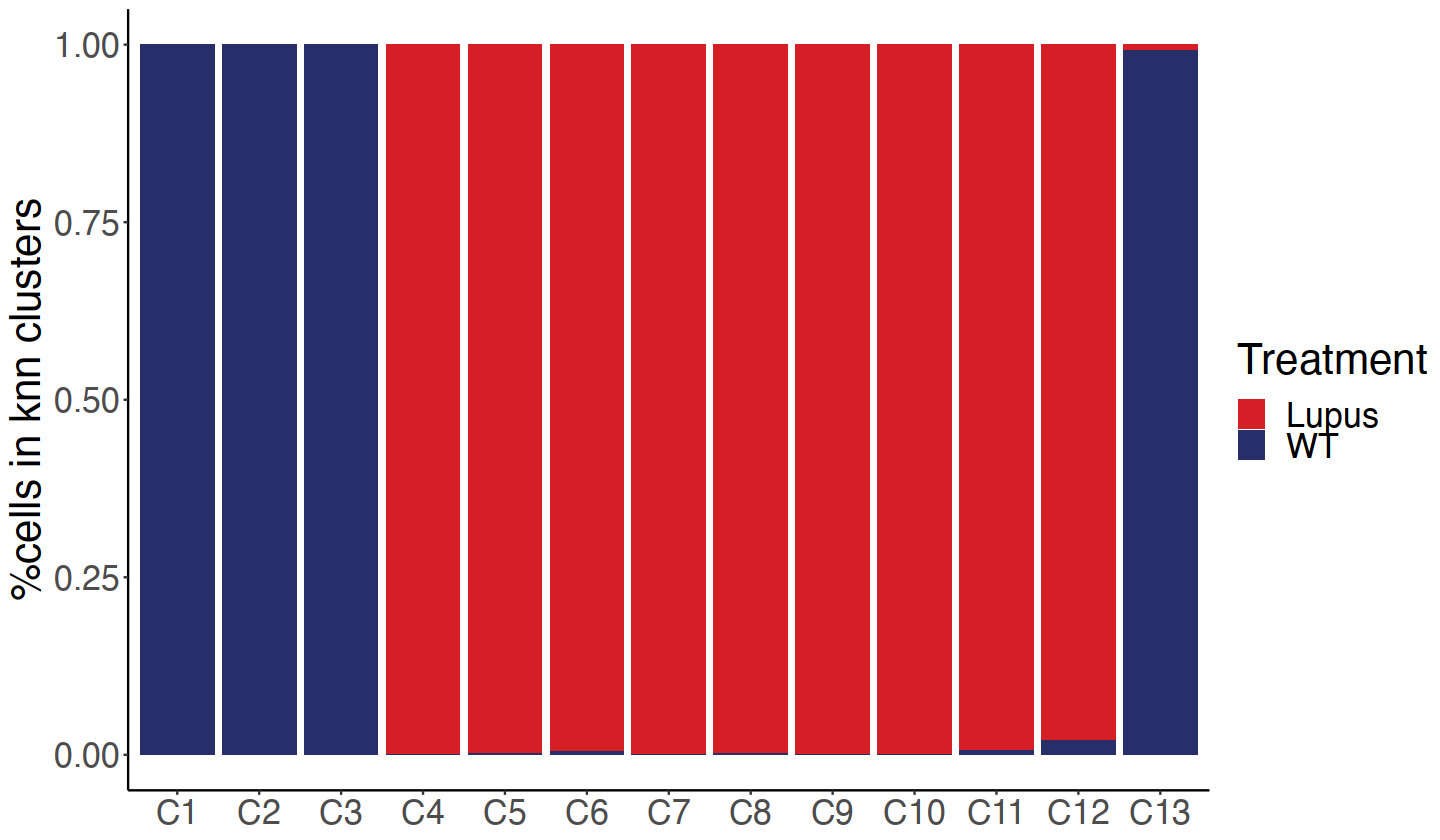

In [13]:
pal <- paletteDiscrete(values = getCellColData(proj3)$Condition)


options(repr.plot.width=12, repr.plot.height=7)

req_DF <- as.data.frame(getCellColData(proj3))

req_table <- melt(table(req_DF$Clusters,req_DF$Condition))
colnames(req_table) <- c("Cluster","Treatment","%cells in knn clusters")
req_table$Cluster <- factor(req_table$Cluster
                        , levels = (unique(req_table[order(as.numeric(gsub("C","",req_table$Cluster))),]$Cluster)))

ggplot(req_table, aes(fill=Treatment, y=`%cells in knn clusters`, x= Cluster))+ geom_bar(stat="identity"
                                                                                      , position = "fill")+
theme_classic() + theme(text = element_text(size = 25)) +theme(axis.title.x=element_blank(),)+
  scale_fill_manual(values= (pal))

# Running Harmony Again!

In [23]:
proj4 <- proj3

In [24]:
########-----------------------------Batch Effect Correction wtih Harmony----------------########
proj4 <- addHarmony(
    ArchRProj = proj4,
    reducedDims = "IterativeLSI",
    name = "Harmony",
    groupBy = "Sample",
    force = TRUE
                      )

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [29]:
proj4 <- addClusters(
    input = proj4,
    reducedDims = "Harmony",
    method = "Seurat",
    name = "Clusters2",
#     resolution = 0.5,
    resolution = 1.5,
    force = TRUE
                    )

ArchR logging to : ArchRLogs/ArchR-addClusters-16825cdac343-Date-2023-05-17_Time-15-05-45.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters2

2023-05-17 15:05:45 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12149
Number of edges: 278835

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6597
Number of communities: 13
Elapsed time: 1 seconds


2023-05-17 15:05:55 : Testing Biased Clusters, 0.159 mins elapsed.

2023-05-17 15:05:55 : Identified Biased Clusters (n = 1), set filterBias = TRUE to re-assign these cells: , 0.159 mins elapsed.

Biased Clusters : 
Cluster5 


2023-05-17 15:05:55 : Testing Outlier Clusters, 0.159 mins elapsed.

2023-05-17 15:05:55 : Assigning Cluster Names to 13 Clusters, 0.159 mins elapsed.

2023-05-17 15:05:55 : Finished addClusters, 0.161 mins elapsed.



In [30]:
proj4 <- addUMAP(
    ArchRProj = proj4, 
    reducedDims = "Harmony", 
    name = "UMAPHarmony", 
    nNeighbors = 20, 
    minDist = 0.5, 
    metric = "cosine",verbose = FALSE,
    ,force = TRUE
                 )

15:06:05 Creating temp model dir /var/folders/19/5vrsks2166z0l3b994vmcj8c0000gp/T//RtmphxtP1D/dir168251f3c0c5c

15:06:05 Creating dir /var/folders/19/5vrsks2166z0l3b994vmcj8c0000gp/T//RtmphxtP1D/dir168251f3c0c5c

15:06:06 Changing to /var/folders/19/5vrsks2166z0l3b994vmcj8c0000gp/T//RtmphxtP1D/dir168251f3c0c5c

15:06:06 Creating /Users/NouroddinSotoudehChafi/Downloads/reports/customers/craft-test_ArchRProject/Embeddings/Save-Uwot-UMAP-Params-Harmony-1682515e1dc25-Date-2023-05-17_Time-15-06-05.tar



Warning message in melt(table(req_DF$Clusters2, req_DF$Condition)):
“The melt generic in data.table has been passed a table and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(table(req_DF$Clusters2, req_DF$Condition)). In the next version, this warning will become an error.”


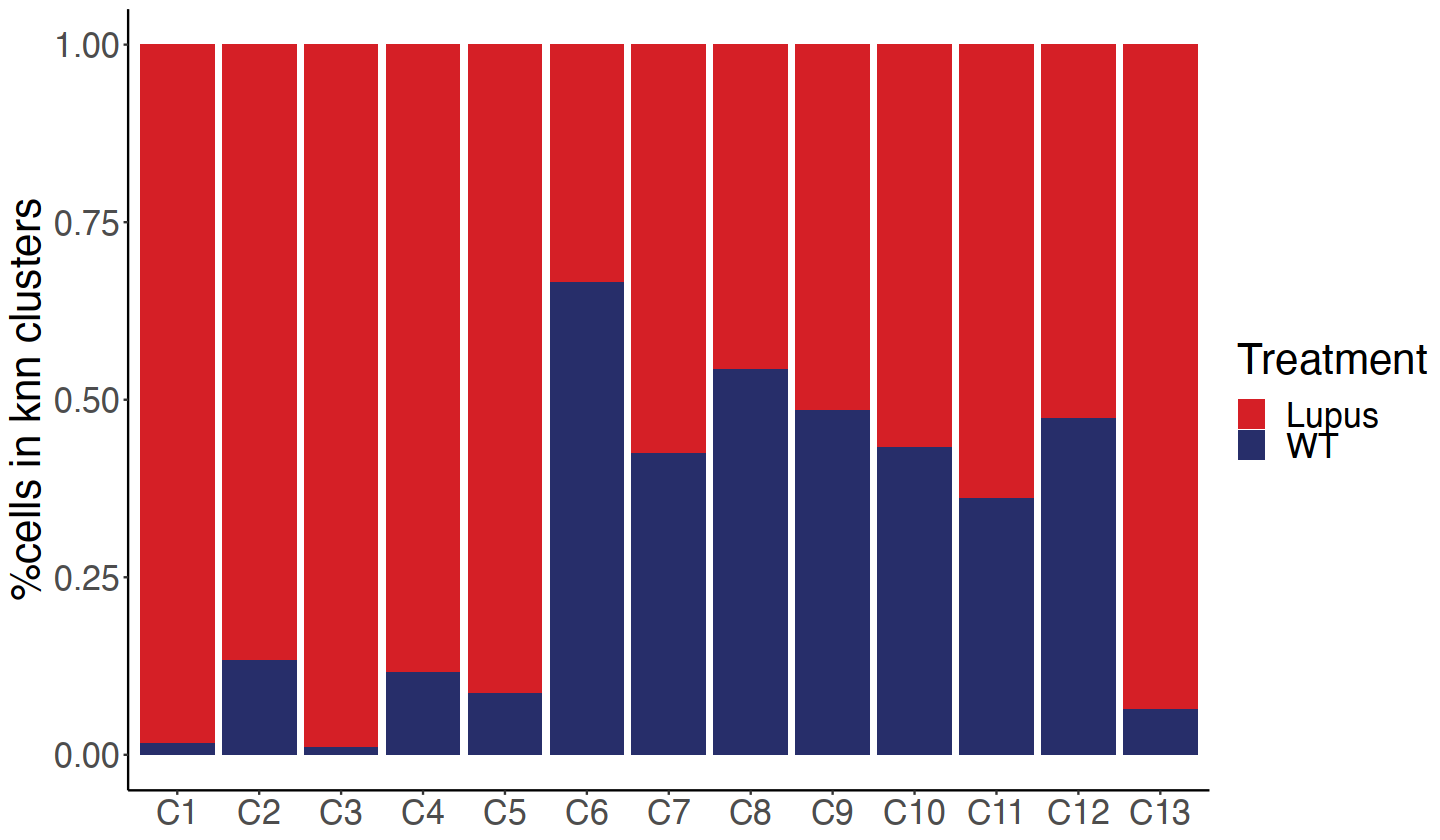

In [31]:
pal <- paletteDiscrete(values = getCellColData(proj4)$Condition)


options(repr.plot.width=12, repr.plot.height=7)

req_DF <- as.data.frame(getCellColData(proj4))

req_table <- melt(table(req_DF$Clusters2,req_DF$Condition))
colnames(req_table) <- c("Cluster","Treatment","%cells in knn clusters")
req_table$Cluster <- factor(req_table$Cluster
                        , levels = (unique(req_table[order(as.numeric(gsub("C","",req_table$Cluster))),]$Cluster)))

ggplot(req_table, aes(fill=Treatment, y=`%cells in knn clusters`, x= Cluster))+ geom_bar(stat="identity"
                                                                                      , position = "fill")+
theme_classic() + theme(text = element_text(size = 25)) +theme(axis.title.x=element_blank(),)+
  scale_fill_manual(values= (pal))

### A few scripts for finding automatically dominated clusters by one of the conditions

In [35]:
df1 <- table(req_DF$Clusters2,req_DF$Condition)

distr <- as.data.frame.matrix(round(prop.table(as.matrix(df1),1),2))

distr

,Lupus,WT
,<dbl>,<dbl>
C1,0.98,0.02
C10,0.57,0.43
C11,0.64,0.36
C12,0.53,0.47
C13,0.94,0.06
C2,0.87,0.13
C3,0.99,0.01
C4,0.88,0.12
C5,0.91,0.09


In [94]:
lst <- list()

for(i in 1:nrow(distr)) {
    row <- distr[i,]
    if (
    sum(unname(unlist(row))>= 0.85) == 1) {
        rownames(row) -> lst[[i]]
    }
}
not_req_list <- unlist(lst)
not_req_list

[1] "C1"  "C13" "C2"  "C3"  "C4"  "C5"

In [97]:
# the above bar plot shows that all of the clusters (EXCEPT 9) have a minimum of each treatment so we don't get 
# error "2 function calls resulted in an error" and we run volcanon for all of the clusters

req_clusters <- unique(proj4$Clusters2)
req_clusters <- req_clusters[order(as.numeric(gsub("C","",req_clusters)))]


# remove cluster 9
req_clusters <- req_clusters[which(!req_clusters%in%not_req_list)]

req_clusters

[1] "C6"  "C7"  "C8"  "C9"  "C10" "C11" "C12"

In [160]:
req_clusters[1]

[1] "C6"

In [98]:

######------------------Identifying Marker Genes grouped by treatment per each cluster -----------------------#######

markerList_C <- list()
proj4_C <- list()

for (i in seq_along(req_clusters)) {
    
   idxSample <- BiocGenerics::which(proj4$Clusters2 == req_clusters[i])
   
   cellsSample <- proj4$cellNames[idxSample]
   proj4_C[i] <- proj4[cellsSample,]
    
    ncells[i] <- length(proj4_C[[i]]$cellNames)

# per each cluster separately
  markerList_C[[i]] <- getMarkerFeatures(
  ArchRProj = proj4_C[[i]],
  useMatrix = "GeneScoreMatrix", 
  groupBy = "Condition",
  bias = c("TSSEnrichment", "log10(nFrags)"),maxCells = ncells[[i]] ,normBy = "none",
  testMethod = "ttest")
    

    }

names(markerList_C) <- req_clusters

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Warning message in `[<-`(`*tmp*`, i, value = proj4[cellsSample, ]):
“implicit list embedding of S4 objects is deprecated”
ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-168251b5842ee-Date-2023-05-17_Time-15-44-33.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2023-05-17 15:44:33 : Matching Known Biases, 0.001 mins elapsed.

Found less than 100 cells for background matching, Lowering k to 98

2023-05-17 15:44:33 : 

2023-05-17 15:44:34 : Computing Pairwise Tests (1 of 2), 0.009 mins elapsed.

Pairwise Test Lupus : Seqnames chr1

Pairwise Test Lupus : Seqnames chr10

Pairwise Test Lupus : Seqnames chr11

Pairwise Test Lupus : Seqnames chr12

Pairwise Test Lupus : Seqnames chr13

Pairwise Test Lupus : Seqnames chr14

Pairwise Test Lupus : Seqnames chr15

Pairwise Test Lupus : Seqnames chr16

Pairwise Test Lupus : Seqnames chr17

Pairwis

Pairwise Test Lupus : Seqnames chrX

2023-05-17 15:46:02 : Computing Pairwise Tests (2 of 2), 0.231 mins elapsed.

Pairwise Test WT : Seqnames chr1

Pairwise Test WT : Seqnames chr10

Pairwise Test WT : Seqnames chr11

Pairwise Test WT : Seqnames chr12

Pairwise Test WT : Seqnames chr13

Pairwise Test WT : Seqnames chr14

Pairwise Test WT : Seqnames chr15

Pairwise Test WT : Seqnames chr16

Pairwise Test WT : Seqnames chr17

Pairwise Test WT : Seqnames chr18

Pairwise Test WT : Seqnames chr19

Pairwise Test WT : Seqnames chr2

Pairwise Test WT : Seqnames chr3

Pairwise Test WT : Seqnames chr4

Pairwise Test WT : Seqnames chr5

Pairwise Test WT : Seqnames chr6

Pairwise Test WT : Seqnames chr7

Pairwise Test WT : Seqnames chr8

Pairwise Test WT : Seqnames chr9

Pairwise Test WT : Seqnames chrX

###########
2023-05-17 15:46:15 : Completed Pairwise Tests, 0.448 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-168252794130d-Date-2023-05-17_Time-15-

In [99]:
# lets find empty genes

gsm <- getMatrixFromProject(proj4)
gsm_mat <- assay(getMatrixFromProject(proj4),"GeneScoreMatrix")

which(rowSums(is.na(gsm_mat))>0)
any(rowSums((gsm_mat))==0)

empty_gene_idx <- which(rowSums((gsm_mat))==0)
empty_gene <- rowData(gsm)$name[empty_gene_idx]
empty_gene

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-168256b87cfe9-Date-2023-05-17_Time-15-49-17.log
If there is an issue, please report to github with logFile!

2023-05-17 15:49:54 : Organizing colData, 0.621 mins elapsed.

2023-05-17 15:49:54 : Organizing rowData, 0.622 mins elapsed.

2023-05-17 15:49:54 : Organizing rowRanges, 0.622 mins elapsed.

2023-05-17 15:49:54 : Organizing Assays (1 of 1), 0.622 mins elapsed.

2023-05-17 15:50:02 : Constructing SummarizedExperiment, 0.75 mins elapsed.

2023-05-17 15:50:02 : Finished Matrix Creation, 0.758 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-1682521630126-Date-2023-05-17_Time-15-50-02.log
If there is an issue, please report to github with logFile!

2023-05-17 15:50:35 : Organizing colData, 0.544 mins elapsed.

2023-05-17 15:50:35 : Organizing rowData, 0.544 mins elapsed.

2023-05-17 15:50:35 : Organizing rowRanges, 0.545 mins elapsed.

2023-05-17 15:50:35 : Organizing Assays (1 of 1), 0.545 mins elapsed.



integer(0)

[1] TRUE

[1] "A530032D15Rik"  "C130026I21Rik"  "Gm7609"         "Sp110"         
  [5] "Sp140"          "Mroh2a"         "Hjurp"          "Eef2"          
  [9] "Snord37"        "Dapk3"          "Sirt6"          "Ankrd24"       
 [13] "Gm10778"        "Zfp433"         "Pisd-ps1"       "Sfi1"          
 [17] "Psme2b"         "9930111J21Rik1" "9930111J21Rik2" "Tgtp1"         
 [21] "Lrrc3c"         "Gsdma3"         "Gsdma2"         "Mir6931"       
 [25] "Smarcd2"        "Slc25a19"       "Actg1"          "Mir6935"       
 [29] "Mcrip1"         "Ppp1r27"        "P4hb"           "Arhgdia"       
 [33] "Anapc11"        "Alyref"         "Npb"            "Pcyt2"         
 [37] "Sirt7"          "Mir6936"        "Mafg"           "1700047I17Rik2"
 [41] "Srp54b"         "Gm4027"         "Gm16381"        "Gm1995"        
 [45] "Gm2016"         "Gm2022"         "Prl2c3"         "Hist1h1b"      
 [49] "Hist1h2bp"      "Hist1h3i"       "Hist1h2an"      "Hist1h2ao"     
 [53] "Hist1h4m"       "Hist1h4n"       "Gm10324"        "Gm21761"       
 [57] "B020031M17Rik"  "Gm21188"        "Gm2897"         "Gm5795"        
 [61] "D830030K20Rik"  "1700110I01Rik"  "Gm10413"        "Gm10409"       
 [65] "Gm3020"         "Gm10408"        "Gm3002"         "Gm5796"        
 [69] "Gm3264"         "4930555G01Rik"  "Gm3317"         "Gm5797"        
 [73] "4930521O11Rik"  "4933406F09Rik"  "Gm3558"         "Plac9a"        
 [77] "Tmem254a"       "Cphx1"          "Duxbl2"         "Plac9b"        
 [81] "Tmem254c"       "Cphx2"          "Tmem254b"       "1700091H14Rik" 
 [85] "Gm17026"        "Gm10377"        "1700001F09Rik"  "Entpd4"        
 [89] "Gsdmcl1"        "Gsdmc3"         "Gsdmcl2"        "Gsdmc4"        
 [93] "Apol9a"         "Sun2"           "Gm16576"        "Atf4"          
 [97] "Smdt1"          "Pou6f1"         "Mucl2"          "Rimbp3"        
[101] "Gsc2"           "Olfr205"        "Olfr206"        "Olfr207"       
[105] "A630089N07Rik"  "Tmem181a"       "Dynlt1a"        "Dynlt1b"       
[109] "Tmem181b-ps"    "Dynlt1c"        "Tmem181c-ps"    "Dynlt1f"       
[113] "Mir692-1"       "Rsph3b"         "Tagap1"         "Tcp10a"        
[117] "Ttll2"          "Gpr31b"         "Tcp10b"         "Gm11166"       
[121] "Unc93a"         "Gm10512"        "Smok2a"         "Smok2b"        
[125] "Gm3448"         "Gm3417"         "9030025P20Rik"  "Gm3435"        
[129] "Tcte3"          "H2-Q5"          "H2-Q6"          "H2-Q7"         
[133] "Lzts2"          "Pdzd7"          "Sfxn3"          "Mir467a-5"     
[137] "Mir467a-2"      "Mir466b-2"      "Lcn2"           "Ptges2"        
[141] "Slc25a25"       "Ell3"           "Serf2"          "Serinc4"       
[145] "Hypk"           "Mfap1b"         "Mfap1a"         "Gm14151"       
[149] "4930442J19Rik"  "4921509C19Rik"  "Trp53rka"       "Gm14393"       
[153] "Gm14440"        "Zfp965"         "Gm6710"         "2210418O10Rik" 
[157] "Zfp973"         "Gm14405"        "Gm14322"        "Psma7"         
[161] "Ss18l1"         "Syt11"          "5830417I10Rik"  "1500004A13Rik" 
[165] "Tdpoz5"         "Hist2h2ab"      "Hist2h2be"      "Hist2h2ac"     
[169] "Hist2h3c2"      "Hist2h2aa2"     "Hist2h3c1"      "Hist2h4"       
[173] "Hist2h3b"       "Hist2h2bb"      "Chil3"          "Amy2a4"        
[177] "Vmn1r3"         "Gm2192"         "Zfp990"         "Gm13212"       
[181] "Zfp980"         "Znf41-ps"       "Gm13238"        "Gm13034"       
[185] "Zfp987"         "Zfp600"         "Zfp992"         "Zfp981"        
[189] "1700095A21Rik"  "Rex2"           "4933438K21Rik"  "Zfp982"        
[193] "Zfp985"         "Zfp979"         "Zfp534"         "Zfp984"        
[197] "Rps19-ps3"      "Vmn2r-ps159"    "Vmn2r123"       "Speer4e"       
[201] "Speer8-ps1"     "Gm10354"        "Gm17019"        "Gm21190"       
[205] "Speer4cos"      "Gm21083"        "Speer4d"        "4930572O03Rik" 
[209] "Smok3b"         "Vmn1r63"        "Clcn4"          "Mir5620"       
[213] "Vmn2r34"        "Vmn2r35"        "Vmn2r36"        "Vmn2r41"       
[217] 

In [100]:
colnames(markerList)

[1] "Lupus" "WT"

In [ ]:
# volcano data for All clusters together

In [107]:
markerList
assays(markerList)

class: SummarizedExperiment 
dim: 24333 2 
metadata(2): MatchInfo Params
assays(8): Log2FC Mean ... MeanBGD VarianceBGD
rownames(24333): 1 2 ... 24332 24333
rowData names(6): seqnames start ... name idx
colnames(2): Lupus WT
colData names(0):

List of length 8
names(8): Log2FC Mean Variance FDR Pval MeanDiff MeanBGD VarianceBGD

In [190]:
grep('Ptprg',rowData(markerList)$name)

[1] 6155

In [191]:
assay(markerList, "Log2FC")[6155,]

,Lupus,WT
,<dbl>,<dbl>
6155,-0.4536593,0.4573488


In [192]:
markerList_df1 <- assay(markerList, "Log2FC")
markerList_df2 <- assay(markerList, "Pval")
markerList_df3 <- assay(markerList, "FDR")
markerList_df <- cbind(markerList_df1,markerList_df2,markerList_df3)
markerList_df$genes<- rowData(markerList)$name
markerList_df$cluster <- rep("All",length(rownames(markerList_df)))

# # we only want to see results of one set , say just sham
markerList_df <- markerList_df[,c(1,3,5,7,8)]
colnames(markerList_df) <- c("avg_log2FC","p_val","p_val_adj","gene","cluster")

# # it happens alot that fdr values are similar. for those cases we only keep fdrs with highest logfc
# markerList_df$logfdr <- -log10(markerList_df$p_val_adj)
# markerList_df <- setDT(markerList_df)[order(-abs(avg_log2FC)), .SD[1L] ,.(logfdr)]


markerList_df

,avg_log2FC,p_val,p_val_adj,gene,cluster
,<dbl>,<dbl>,<dbl>,<chr[1d]>,<chr>
1,-0.1542860367,5.384929e-10,7.209205e-09,Xkr4,All
2,-0.2088780071,3.359430e-08,3.375020e-07,Rp1,All
3,-0.3015030058,4.298071e-13,8.466143e-12,Sox17,All
4,-0.1082289735,1.231101e-02,3.343268e-02,Mrpl15,All
5,0.0227820632,6.265909e-01,7.328372e-01,Lypla1,All
6,0.0216478016,6.366870e-01,7.411104e-01,Tcea1,All
7,-0.1201446093,6.505531e-03,1.950036e-02,Rgs20,All
8,0.1116161028,2.738969e-03,9.311099e-03,Atp6v1h,All
9,-0.1636455701,4.580752e-04,1.982353e-03,Oprk1,All


In [193]:
table(markerList_df$cluster)


  All 
24333 

In [ ]:
# volcano data per cluster separately

In [114]:
req_clusters

[1] "C6"  "C7"  "C8"  "C9"  "C10" "C11" "C12"

### Here I changed naming of the clusters

In [194]:

markerList_df1_C <- list()
markerList_df2_C <- list()
markerList_df3_C <- list()
markerList_df_C <- list()

# for (i in (1:nClust)){
for (i in seq_along(req_clusters)){
    
cluster <- req_clusters[i]
    
markerList_df1_C[[i]] <- assay(markerList_C[[i]], "Log2FC")
markerList_df2_C[[i]] <- assay(markerList_C[[i]], "Pval")
markerList_df3_C[[i]] <- assay(markerList_C[[i]], "FDR")
    
markerList_df_C[[i]] <- cbind(markerList_df1_C[[i]]
                              ,markerList_df2_C[[i]]
                              ,markerList_df3_C[[i]])
    
markerList_df_C[[i]]$genes<- rowData(markerList_C[[i]])$name
markerList_df_C[[i]]$cluster <- rep(cluster,length(rownames(markerList_df_C[[i]])))

# # we only want to see results of one set , say just sham
markerList_df_C[[i]] <- markerList_df_C[[i]][,c(1,3,5,7,8)]
colnames(markerList_df_C[[i]]) <- c("avg_log2FC","p_val","p_val_adj","gene","cluster")

    
# # it happens alot that fdr values are similar
# # we only keep fdrs with highest logfc
# markerList_df_C[[i]]$logfdr <- -log10(markerList_df_C[[i]]$p_val_adj)
# markerList_df_C[[i]] <- setDT(markerList_df_C[[i]])[order(-abs(avg_log2FC)), .SD[1L] ,.(logfdr)]

    }


names(markerList_df_C) <- req_clusters

In [195]:
for (i in seq_along(req_clusters)){
    
print(req_clusters[i])
    }

[1] "C6"
[1] "C7"
[1] "C8"
[1] "C9"
[1] "C10"
[1] "C11"
[1] "C12"


In [196]:
#### merge all data frames

markersGS_merged_df <- do.call("rbind", markerList_df_C)

# also data frame for all clusters together needs to be added

markersGS_merged_df <- rbind(markerList_df,markersGS_merged_df)

In [197]:
# remove empty genes
markersGS_merged_df <- markersGS_merged_df[which(!markersGS_merged_df$gene%in%empty_gene),]

# remove na values
markersGS_merged_df <- na.omit(markersGS_merged_df)

# remove FDR equal to 0
markersGS_merged_df <- markersGS_merged_df[which(!markersGS_merged_df$p_val_adj== 0),]



# make logfc limiation between 1 and -1

markersGS_merged_df <- markersGS_merged_df[which(abs(markersGS_merged_df$avg_log2FC)< 1.2),]

markersGS_merged_df$Significance = ifelse(markersGS_merged_df$p_val_adj < 10^-1 , 
#                                           abs(markersGS_merged_df$avg_log2FC) >= 0.58, 
                     ifelse(markersGS_merged_df$avg_log2FC> 0.0 
                            ,colnames(markerList)[1],colnames(markerList)[2]),
                     'Not siginficant')
markersGS_merged_df 

,avg_log2FC,p_val,p_val_adj,gene,cluster,Significance
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,-0.1542860367,5.384929e-10,7.209205e-09,Xkr4,All,WT
2,-0.2088780071,3.359430e-08,3.375020e-07,Rp1,All,WT
3,-0.3015030058,4.298071e-13,8.466143e-12,Sox17,All,WT
4,-0.1082289735,1.231101e-02,3.343268e-02,Mrpl15,All,WT
5,0.0227820632,6.265909e-01,7.328372e-01,Lypla1,All,Not siginficant
6,0.0216478016,6.366870e-01,7.411104e-01,Tcea1,All,Not siginficant
7,-0.1201446093,6.505531e-03,1.950036e-02,Rgs20,All,WT
8,0.1116161028,2.738969e-03,9.311099e-03,Atp6v1h,All,Lupus
9,-0.1636455701,4.580752e-04,1.982353e-03,Oprk1,All,WT


In [181]:
table(markersGS_merged_df$cluster)


  All   C10   C11   C12    C6    C7    C8    C9 
23867 23792 23798 23867 23889 23876 23837 23844 

In [198]:
de <- markersGS_merged_df
table(de$Significance)


          Lupus Not siginficant              WT 
          13793          162533           14502 

In [199]:
write.table(de,"inpMarkers.txt", sep = '\t', quote = F, row.names = F)

In [200]:
inpMarkers = fread("./inpMarkers.txt") 
# inpMarkers

In [201]:
# let's test
library(ggplot2)
library(grid)
library(ggrepel)
library(ggpubr)

Warning message:
“ggrepel: 2973 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


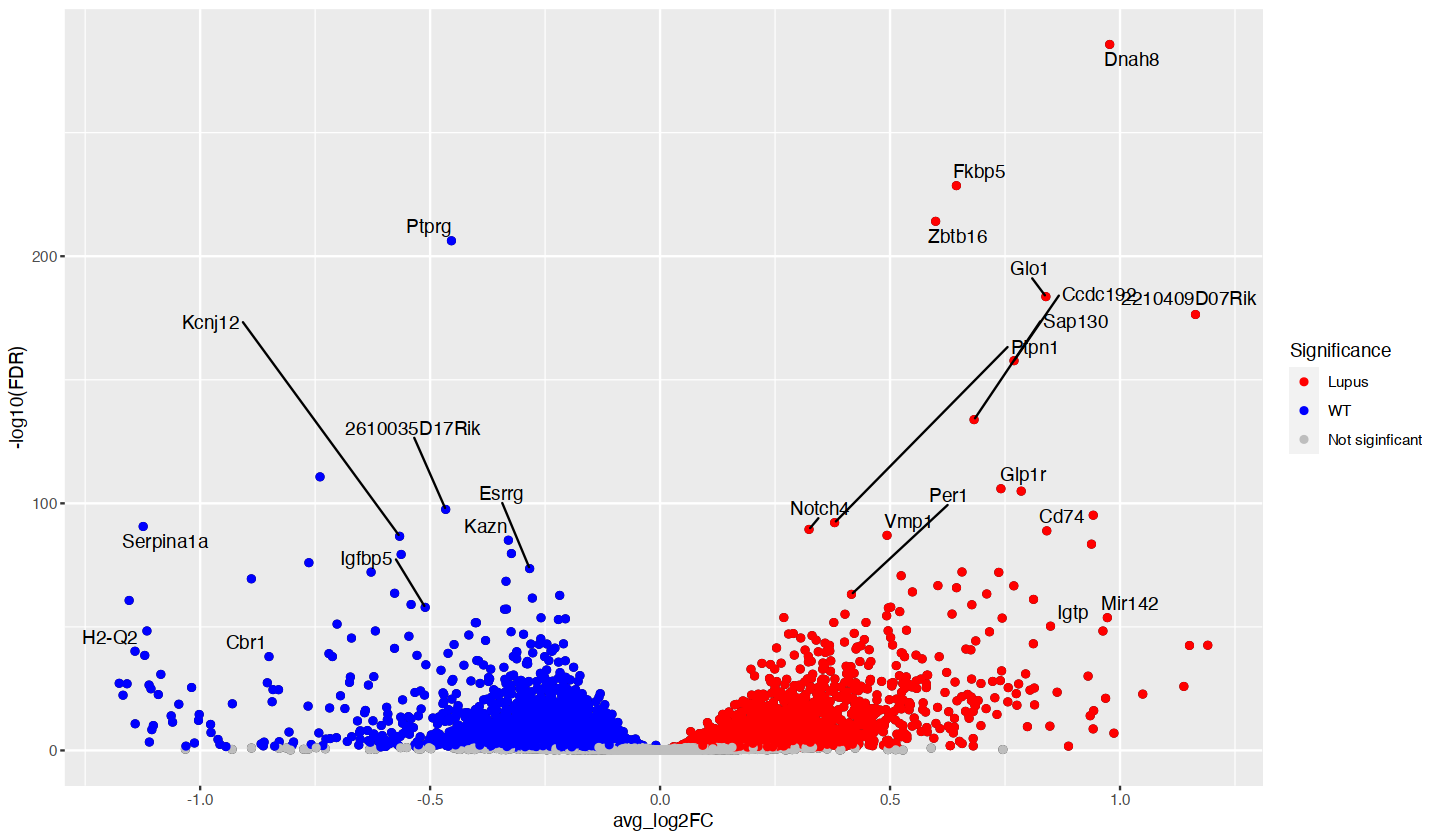

In [202]:
targeted <- 'All'

#   minfdr = 10^-(1/3 *(-log10(min(inpMarkers[cluster == targeted]$p_val_adj))))
    minfdr = 0.05
  minfdr2 = 10^-(2/3 *(-log10(min(inpMarkers[cluster == targeted]$p_val_adj))))

ggData = inpMarkers[cluster == targeted]
ggData$Significance = ifelse(ggData$p_val_adj < minfdr ,
#                              & abs(ggData$avg_log2FC) >= 0.58,
                                 ifelse(ggData$avg_log2FC > 0.0
                                        ,"Lupus","WT")
                                 ,'Not siginficant'
    )


ggData$Significance <- factor(
                               ggData$Significance,
                               levels = c('Lupus','WT','Not siginficant')
                             )


    ggData[p_val_adj < 1e-300]$p_val_adj = 1e-300
    ggData$log10fdr = -log10(ggData$p_val_adj)
    ggplot(ggData, aes(avg_log2FC, log10fdr)) + 
    geom_point() + 
# sctheme() + 
    ylab("-log10(FDR)") +

    geom_point(aes(color = Significance)) +

    scale_color_manual(values = c("red","blue","grey")) +

    geom_text_repel(
    data = subset(ggData, p_val_adj < 10^-5 ),
    aes(label = gene))

# for Shiny app

In [ ]:
# Extract umap from project

In [ ]:
names(proj3@reducedDims$Harmony@listData)

In [ ]:
plotEmbedding(ArchRProj = proj3, colorBy = "cellColData", name = "Clusters_edited", embedding = "UMAPHarmony"
                  ,size=1.0, baseSize = 10)+
            theme(legend.position = "right",legend.direction= "vertical"
                , legend.text=element_text(size=20), legend.title=element_text(size=0))+
   theme(
  plot.title = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank())
# p4

In [ ]:
UMAPHarmony <-getEmbedding(ArchRProj = proj3, embedding = "UMAPHarmony", returnDF = TRUE)
UMAPHarmony

In [ ]:
write.csv(UMAPHarmony,"UMAPHarmony.csv")

In [ ]:
# Motif Logo

library("seqLogo")
require(ggseqlogo)
library(ArchR)
library(chromVARmotifs)

# data("human_pwms_v1")

PWMs <- getPeakAnnotation(proj3, "Motif")$motifs

PWMatrixToProbMatrix <- function(x){
	if (class(x) != "PWMatrix") stop("x must be a TFBSTools::PWMatrix object")
	(exp(as(x, "matrix"))) * TFBSTools::bg(x)/sum(TFBSTools::bg(x))
}
 
ProbMatrices <- lapply(PWMs, PWMatrixToProbMatrix)
lapply(ProbMatrices, colSums) %>% range
#[1] 0.9999996 1.0000004

#Maybe we can just tidy this up a tiny bit

PWMatrixToProbMatrix <- function(x){
	if (class(x) != "PWMatrix") stop("x must be a TFBSTools::PWMatrix object")
	m <- (exp(as(x, "matrix"))) * TFBSTools::bg(x)/sum(TFBSTools::bg(x))
	m <- t(t(m)/colSums(m))
	m
}

ProbMatrices <- lapply(PWMs, PWMatrixToProbMatrix)
lapply(ProbMatrices, colSums) %>% range
#[1] 1 1

In [ ]:
grep("AP1_714", names(ProbMatrices))

In [ ]:

ggseqlogo(ProbMatrices[c(grep(paste0("^","AP1_714","$"), names(ProbMatrices)))])


In [ ]:
saveRDS(ProbMatrices,"seqlogo.rds")

# Default genes for heatmaps

In [ ]:
suppressPackageStartupMessages(library("ComplexHeatmap"))
suppressPackageStartupMessages(library("circlize"))
suppressPackageStartupMessages(library(data.table))

In [ ]:
hm_per_clust <- read.csv("genes_per_cluster_hm.csv")
# hm_per_clust
hm_per_sample <- read.csv("genes_per_sample_hm.csv")
# hm_per_sample
hm_per_cond <- read.csv("genes_per_treatment_hm.csv")

In [ ]:
nClust = 9


df = list()


for (i in seq_along(1:nClust)){
df[[i]] <- hm_per_clust[,c(1,i+1)]

#select top 5 values by group

df[[i]] <- df[[i]][order(df[[i]][,2], decreasing = T),][1:5,1]

}
final <- do.call(rbind, df)
final

In [ ]:
req_genes1 <- unlist(df)

req_genes1<- req_genes1[!duplicated(req_genes1)]

# save the genes for default values in shiny app

write.csv(req_genes1,"req_genes1.csv")

In [ ]:
# per treatment

nConds = 2


df = list()

for (i in seq_along(1:nConds)){
df[[i]] <- hm_per_cond[,c(1,i+1)]

#select top 20 values by group

df[[i]] <- df[[i]][order(df[[i]][,2], decreasing = T),][1:20,1]

}
final <- do.call(rbind, df)
# final
req_genes2 <- unlist(df)

req_genes2<- req_genes2[!duplicated(req_genes2)]

write.csv(req_genes2,"req_genes2.csv")

In [ ]:
# per sample

nSamples = 4


df = list()

for (i in seq_along(1:nSamples)){
df[[i]] <- hm_per_sample[,c(1,i+1)]

#select top 10 values by group

df[[i]] <- df[[i]][order(df[[i]][,2], decreasing = T),][1:10,1]

}
final <- do.call(rbind, df)
# final
req_genes3 <- unlist(df)

req_genes3<- req_genes3[!duplicated(req_genes3)]

write.csv(req_genes3,"req_genes3.csv")